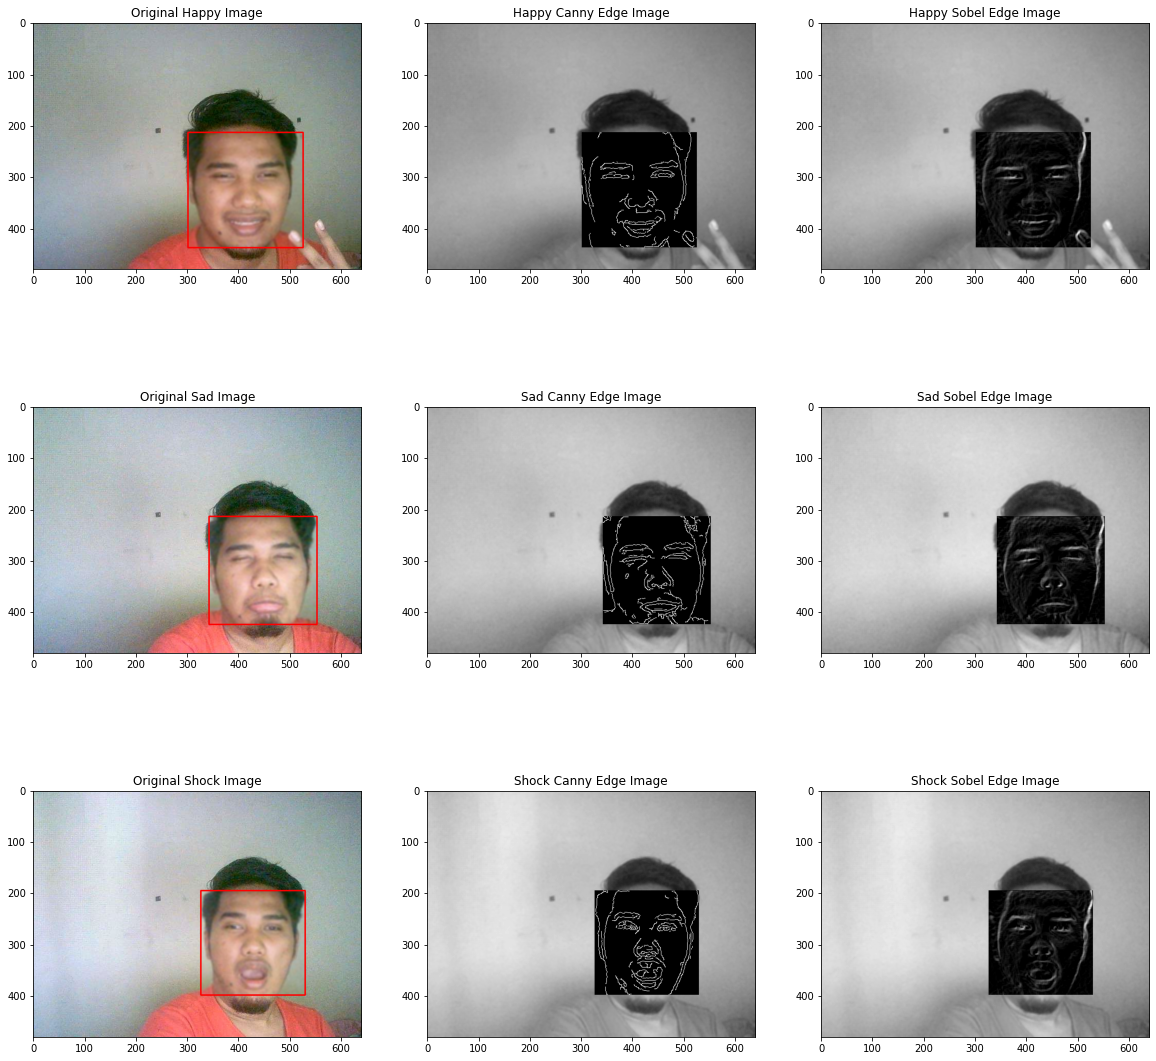

In [19]:
#import module
import cv2
import numpy as np
import matplotlib.pyplot as plt

#path directory
path= "/content/drive/MyDrive/Assignment Python/"

#open image
happyImg = cv2.imread(path+ "happy.jpg")
sadImg = cv2.imread(path+ "sad.jpg")
shockImg = cv2.imread(path+ "shock.jpg")

#convert image to RGB
happyImg = cv2.cvtColor(happyImg, cv2.COLOR_BGR2RGB)
sadImg = cv2.cvtColor(sadImg, cv2.COLOR_BGR2RGB)
shockImg = cv2.cvtColor(shockImg, cv2.COLOR_BGR2RGB)

#copy image for blur
happyImgBlur = np.copy(happyImg)
sadImgBlur = np.copy(sadImg)
shockImgBlur = np.copy(shockImg)

#image for gray
happyImgGray = cv2.cvtColor(happyImg,cv2.COLOR_RGB2GRAY)
sadImgGray = cv2.cvtColor(sadImg,cv2.COLOR_RGB2GRAY)
shockImgGray = cv2.cvtColor(shockImg,cv2.COLOR_RGB2GRAY)

#image for Gaussian Blurr
happyBlur = cv2.GaussianBlur(happyImgGray,(5,5),10)
sadBlur = cv2.GaussianBlur(sadImgGray,(5,5),10)
shockBlur = cv2.GaussianBlur(shockImgGray,(5,5),10)

#copy image for Canny and Sobel Happy
cannyHappyImg = np.copy(happyBlur)
sobelHappyImg = np.copy(happyBlur)

#copy image for Canny and Sobel Sad
cannySadImg = np.copy(sadBlur)
sobelSadImg = np.copy(sadBlur)

#copy image for Canny and Sobel Shock
cannyShockImg = np.copy(shockBlur)
sobelShockImg = np.copy(shockBlur)

#initialize the Haar Cascade face detection model
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_alt.xml")

#face bounding box coordinates using Haar Cascade
detections1 = face_cascade.detectMultiScale(happyImg)
detections2 = face_cascade.detectMultiScale(sadImg)
detections3 = face_cascade.detectMultiScale(shockImg)

#blurr image 1
for face in detections1:
  x,y,w,h = face
  #blur happy image
  happyImgBlur[y:y+h,x:x+w] = cv2.GaussianBlur(happyImgBlur[y:y+h,x:x+w],(5,5),cv2.BORDER_DEFAULT)
  cv2.rectangle(happyImgBlur,(x,y),(x+w,y+h),(255,0,0),2)
  # canny edge detection
  cannyHappyImg[y:y+h,x:x+w] = cv2.Canny(cannyHappyImg[y:y+h,x:x+w],20,70) 
  # sobel edge detection
  sobelx = cv2.Sobel(sobelHappyImg[y:y+h,x:x+w], cv2.CV_8U,1,0,ksize=3)
  sobely = cv2.Sobel(sobelHappyImg[y:y+h,x:x+w], cv2.CV_8U,0,1,ksize=3)
  sobelHappyImg[y:y+h,x:x+w] = sobelx + sobely

#blurr image 2
for face in detections2:
  x,y,w,h = face
  #blur sad image
  sadImgBlur[y:y+h,x:x+w] = cv2.GaussianBlur(sadImgBlur[y:y+h,x:x+w],(5,5),cv2.BORDER_DEFAULT)
  cv2.rectangle(sadImgBlur,(x,y),(x+w,y+h),(255,0,0),2)
  # canny edge detection
  cannySadImg[y:y+h,x:x+w] = cv2.Canny(cannySadImg[y:y+h,x:x+w],20,70) 
  # sobel edge detection
  sobelx = cv2.Sobel(sobelSadImg[y:y+h,x:x+w], cv2.CV_8U,1,0,ksize=3)
  sobely = cv2.Sobel(sobelSadImg[y:y+h,x:x+w], cv2.CV_8U,0,1,ksize=3)
  sobelSadImg[y:y+h,x:x+w] = sobelx + sobely

#blurr image 3
for face in detections3:
  x,y,w,h = face
  #blur shock image 
  shockImgBlur[y:y+h,x:x+w] = cv2.GaussianBlur(shockImgBlur[y:y+h,x:x+w],(5,5),cv2.BORDER_DEFAULT)
  cv2.rectangle(shockImgBlur,(x,y),(x+w,y+h),(255,0,0),2)
  # canny edge detection
  cannyShockImg[y:y+h,x:x+w] = cv2.Canny(cannyShockImg[y:y+h,x:x+w],20,70)
  # sobel edge detection
  sobelx = cv2.Sobel(sobelShockImg[y:y+h,x:x+w], cv2.CV_8U,1,0,ksize=3)
  sobely = cv2.Sobel(sobelShockImg[y:y+h,x:x+w], cv2.CV_8U,0,1,ksize=3)
  sobelShockImg[y:y+h,x:x+w] = sobelx + sobely

#display image
plt.figure(figsize=[20,20])
plt.subplot(331);plt.imshow(happyImgBlur, cmap="gray");plt.title("Original Happy Image")
plt.subplot(332);plt.imshow(cannyHappyImg, cmap="gray");plt.title("Happy Canny Edge Image")
plt.subplot(333);plt.imshow(sobelHappyImg, cmap="gray");plt.title("Happy Sobel Edge Image")
plt.subplot(334);plt.imshow(sadImgBlur, cmap="gray");plt.title("Original Sad Image")
plt.subplot(335);plt.imshow(cannySadImg, cmap="gray");plt.title("Sad Canny Edge Image")
plt.subplot(336);plt.imshow(sobelSadImg, cmap="gray");plt.title("Sad Sobel Edge Image")
plt.subplot(337);plt.imshow(shockImgBlur, cmap="gray");plt.title("Original Shock Image")
plt.subplot(338);plt.imshow(cannyShockImg,cmap="gray");plt.title("Shock Canny Edge Image")
plt.subplot(339);plt.imshow(sobelShockImg, cmap="gray");plt.title("Shock Sobel Edge Image")

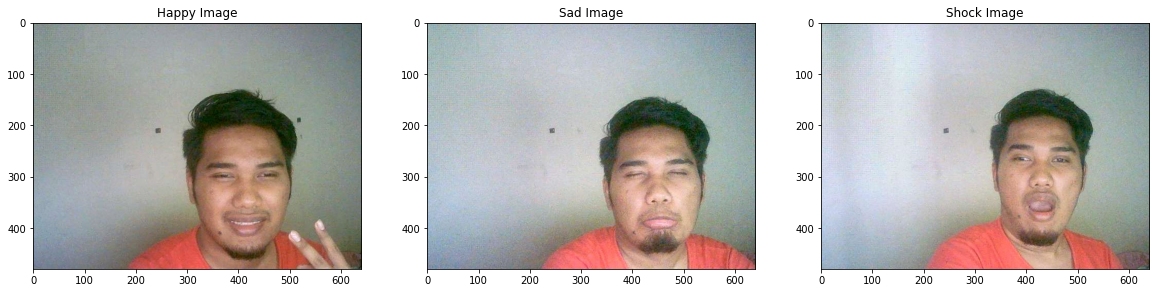

In [21]:
plt.figure(figsize=[20,20])
plt.subplot(331);plt.imshow(happyImg);plt.title("Happy Image")
plt.subplot(332);plt.imshow(sadImg);plt.title("Sad Image")
plt.subplot(333);plt.imshow(shockImg);plt.title("Shock Image")
plt.show()